In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import signac
from scipy.stats import sem

from cmeutils.sampling import equil_sample

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

****** PyMBAR will use 64-bit JAX! *******
* JAX is currently set to 32-bit bitsize *
* which is its default.                  *
*                                        *
* PyMBAR requires 64-bit mode and WILL   *
* enable JAX's 64-bit mode when called.  *
*                                        *
* This MAY cause problems with other     *
* Uses of JAX in the same code.          *
******************************************



In [2]:
# Matplotlib RC Params:    
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["legend.fontsize"] = 7
plt.rcParams['lines.markersize'] = 3
plt.rcParams["lines.linestyle"] = "-"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["legend.markerscale"] = 1

SAVE_FIGS = True
length_unit = "$\sigma$"

In [3]:
project = signac.get_project("../../testing-model/performance/")

2000 9551.0
8000 5407.0
18000 3851.0
32000 2351.0
72000 947.0
128000 1046.0
200000 699.0
288000 516.0


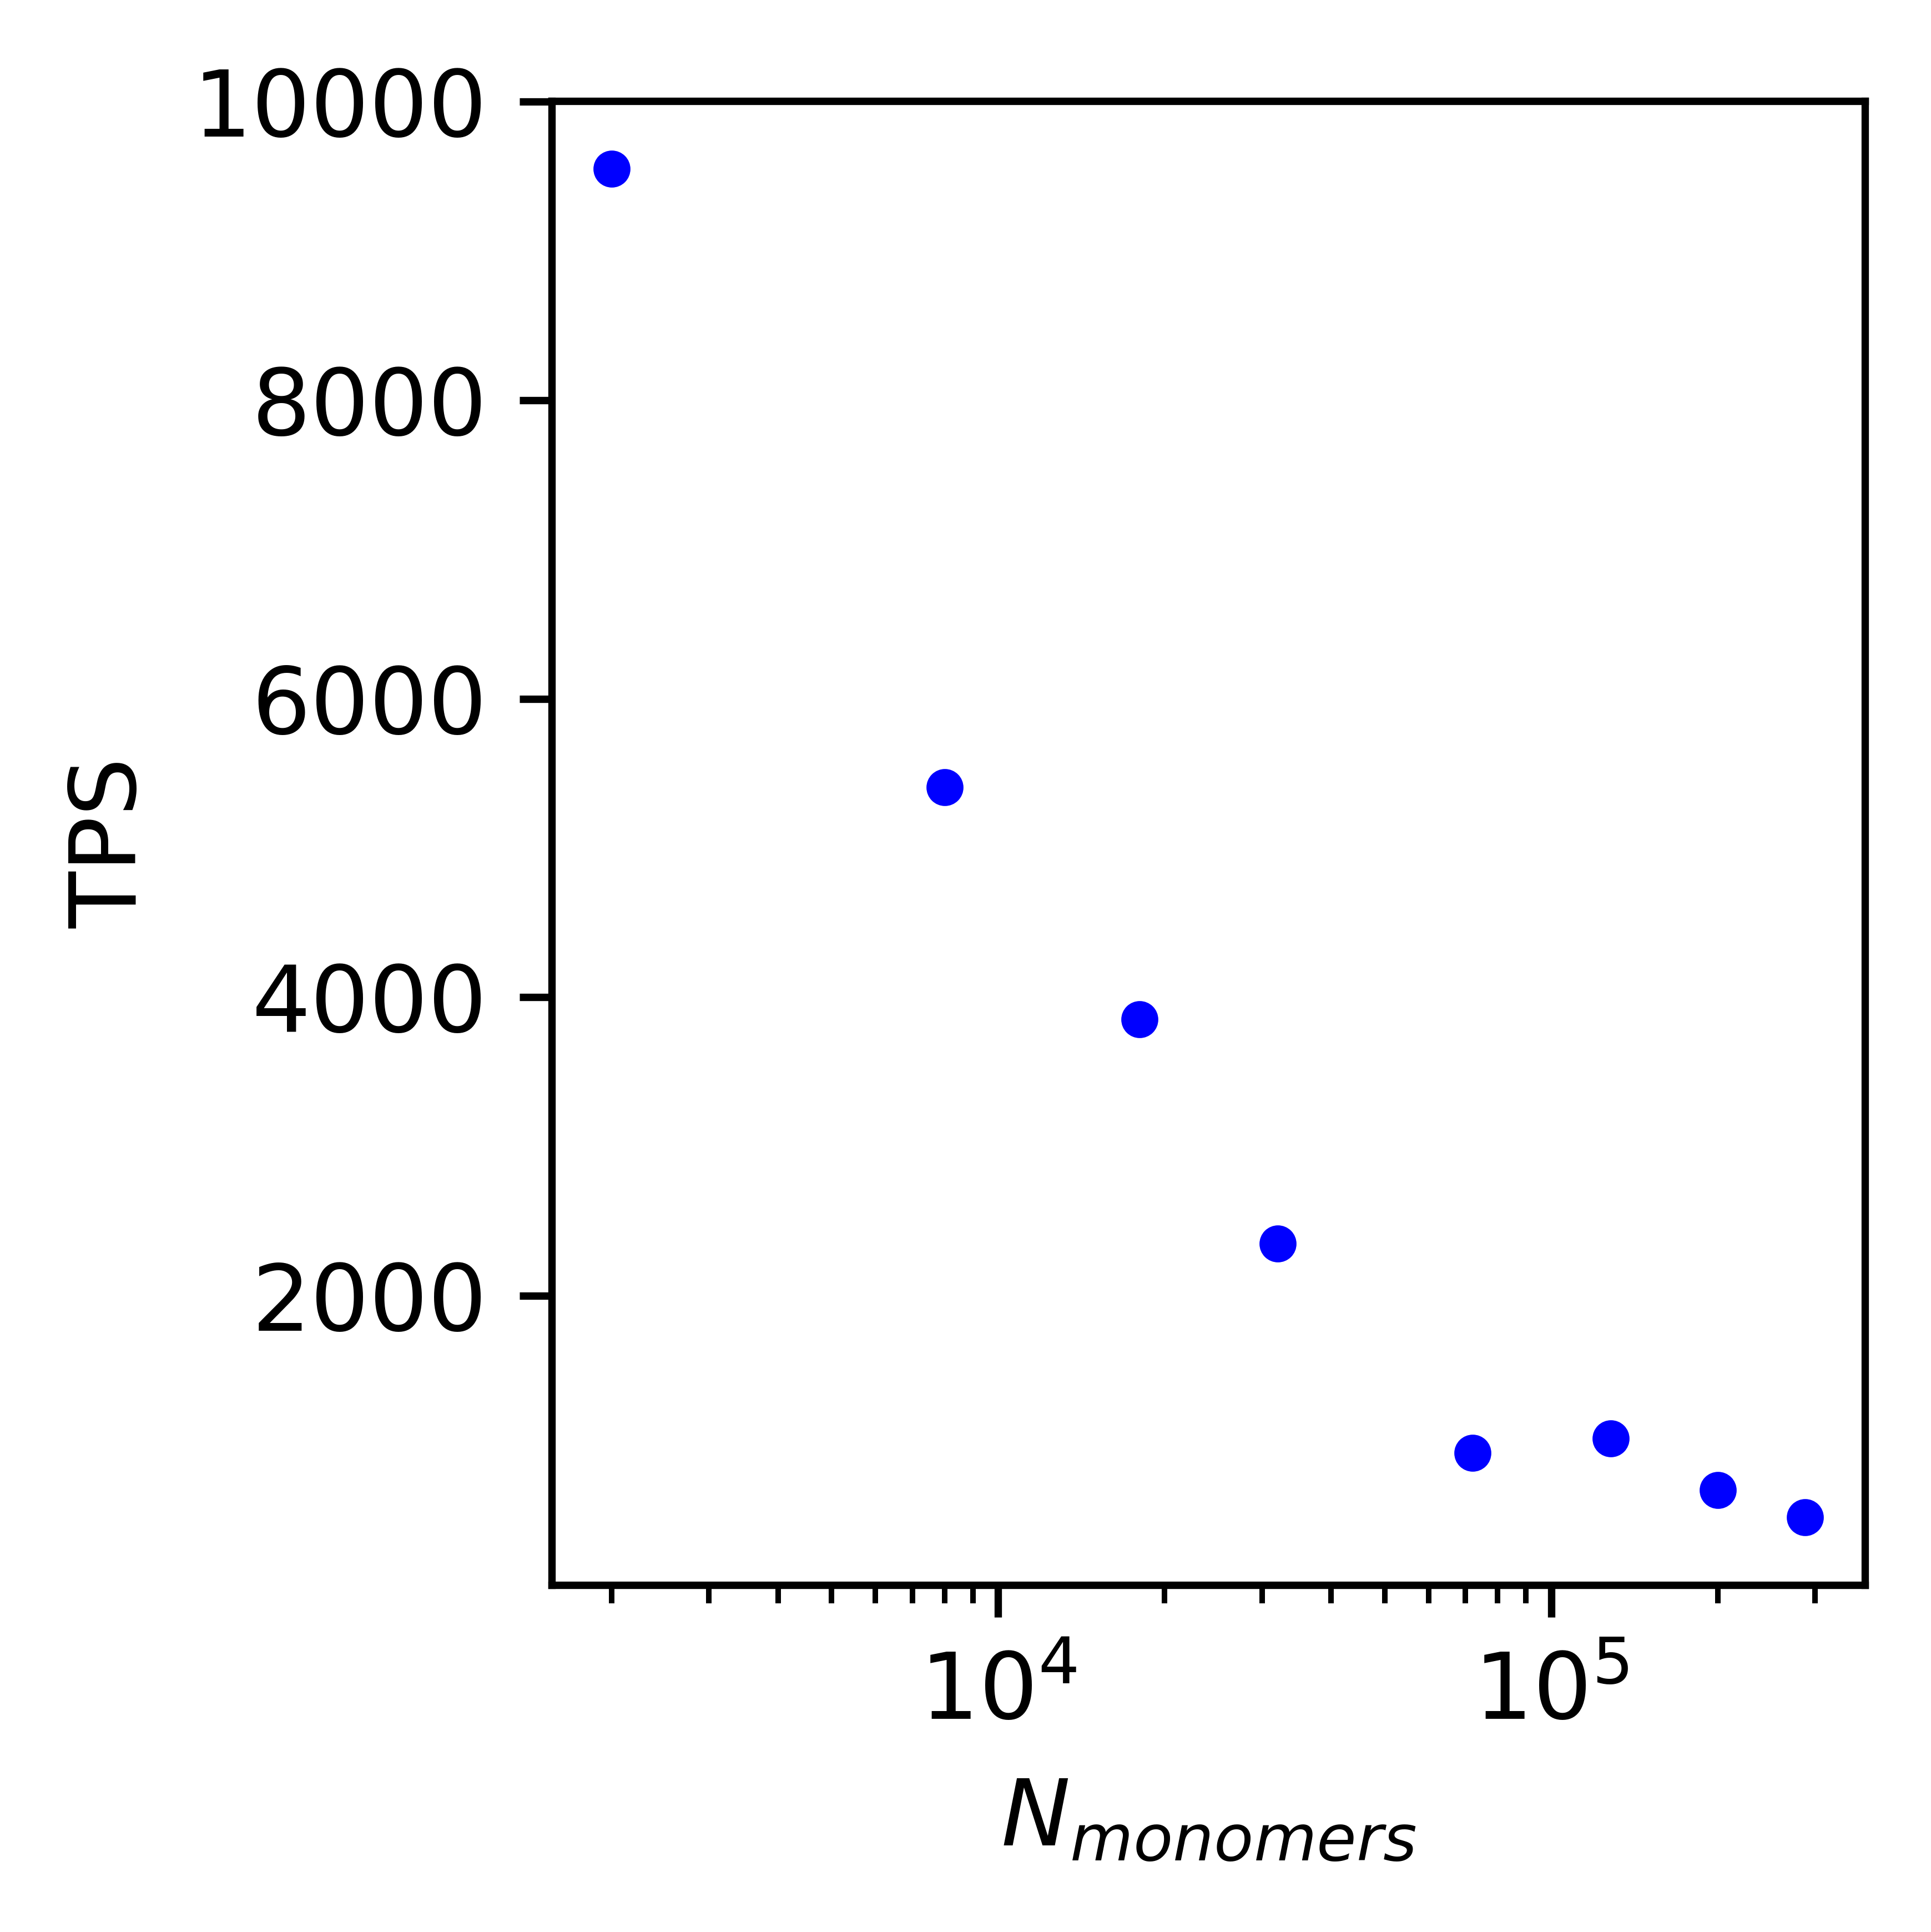

In [5]:
fig = plt.figure()

for N, jobs in project.find_jobs({"use_tree": False}).groupby("n_repeats"):
    for job in jobs:
        data = np.genfromtxt(job.fn("log0.txt"), names=True)
        tps = data["flowermdbasesimulationSimulationtps"]
        avg_tps = np.mean(tps[-500:])
        plt.plot(int(job.doc.num_mols * job.sp.lengths), avg_tps, "o", color="blue")
        print(job.doc.num_mols * job.sp.lengths, np.round(avg_tps, 0))

#for N, jobs in project.find_jobs({"use_tree": True}).groupby("n_repeats"):
#    for job in jobs:
#        if job.doc.runs != 1:
#            continue
#        data = np.genfromtxt(job.fn("log0.txt"), names=True)
#        tps = data["flowermdbasesimulationSimulationtps"]
#        avg_tps = np.mean(tps[-500:])
#        plt.plot(job.doc.num_mols * 40, avg_tps, "o", color="orange")


plt.xscale("log")
plt.ylabel("TPS")
plt.xlabel("$N_{monomers}$")
plt.tight_layout()
if SAVE_FIGS:
    plt.savefig("../../FIGS/cg-model-tps.png")

# Measuring maximum step size dt

In [40]:
dt_project = signac.get_project("../../testing-model/test-dt/")

0.0003 3.0004 +/- 0.0486
0.0006 2.9983 +/- 0.0486
0.0008 3.0002 +/- 0.0493
0.001 2.9997 +/- 0.0499
0.002 3.001 +/- 0.0497
0.003 2.9972 +/- 0.0459
0.004 2.9944 +/- 0.049
0.005 2.9922 +/- 0.049


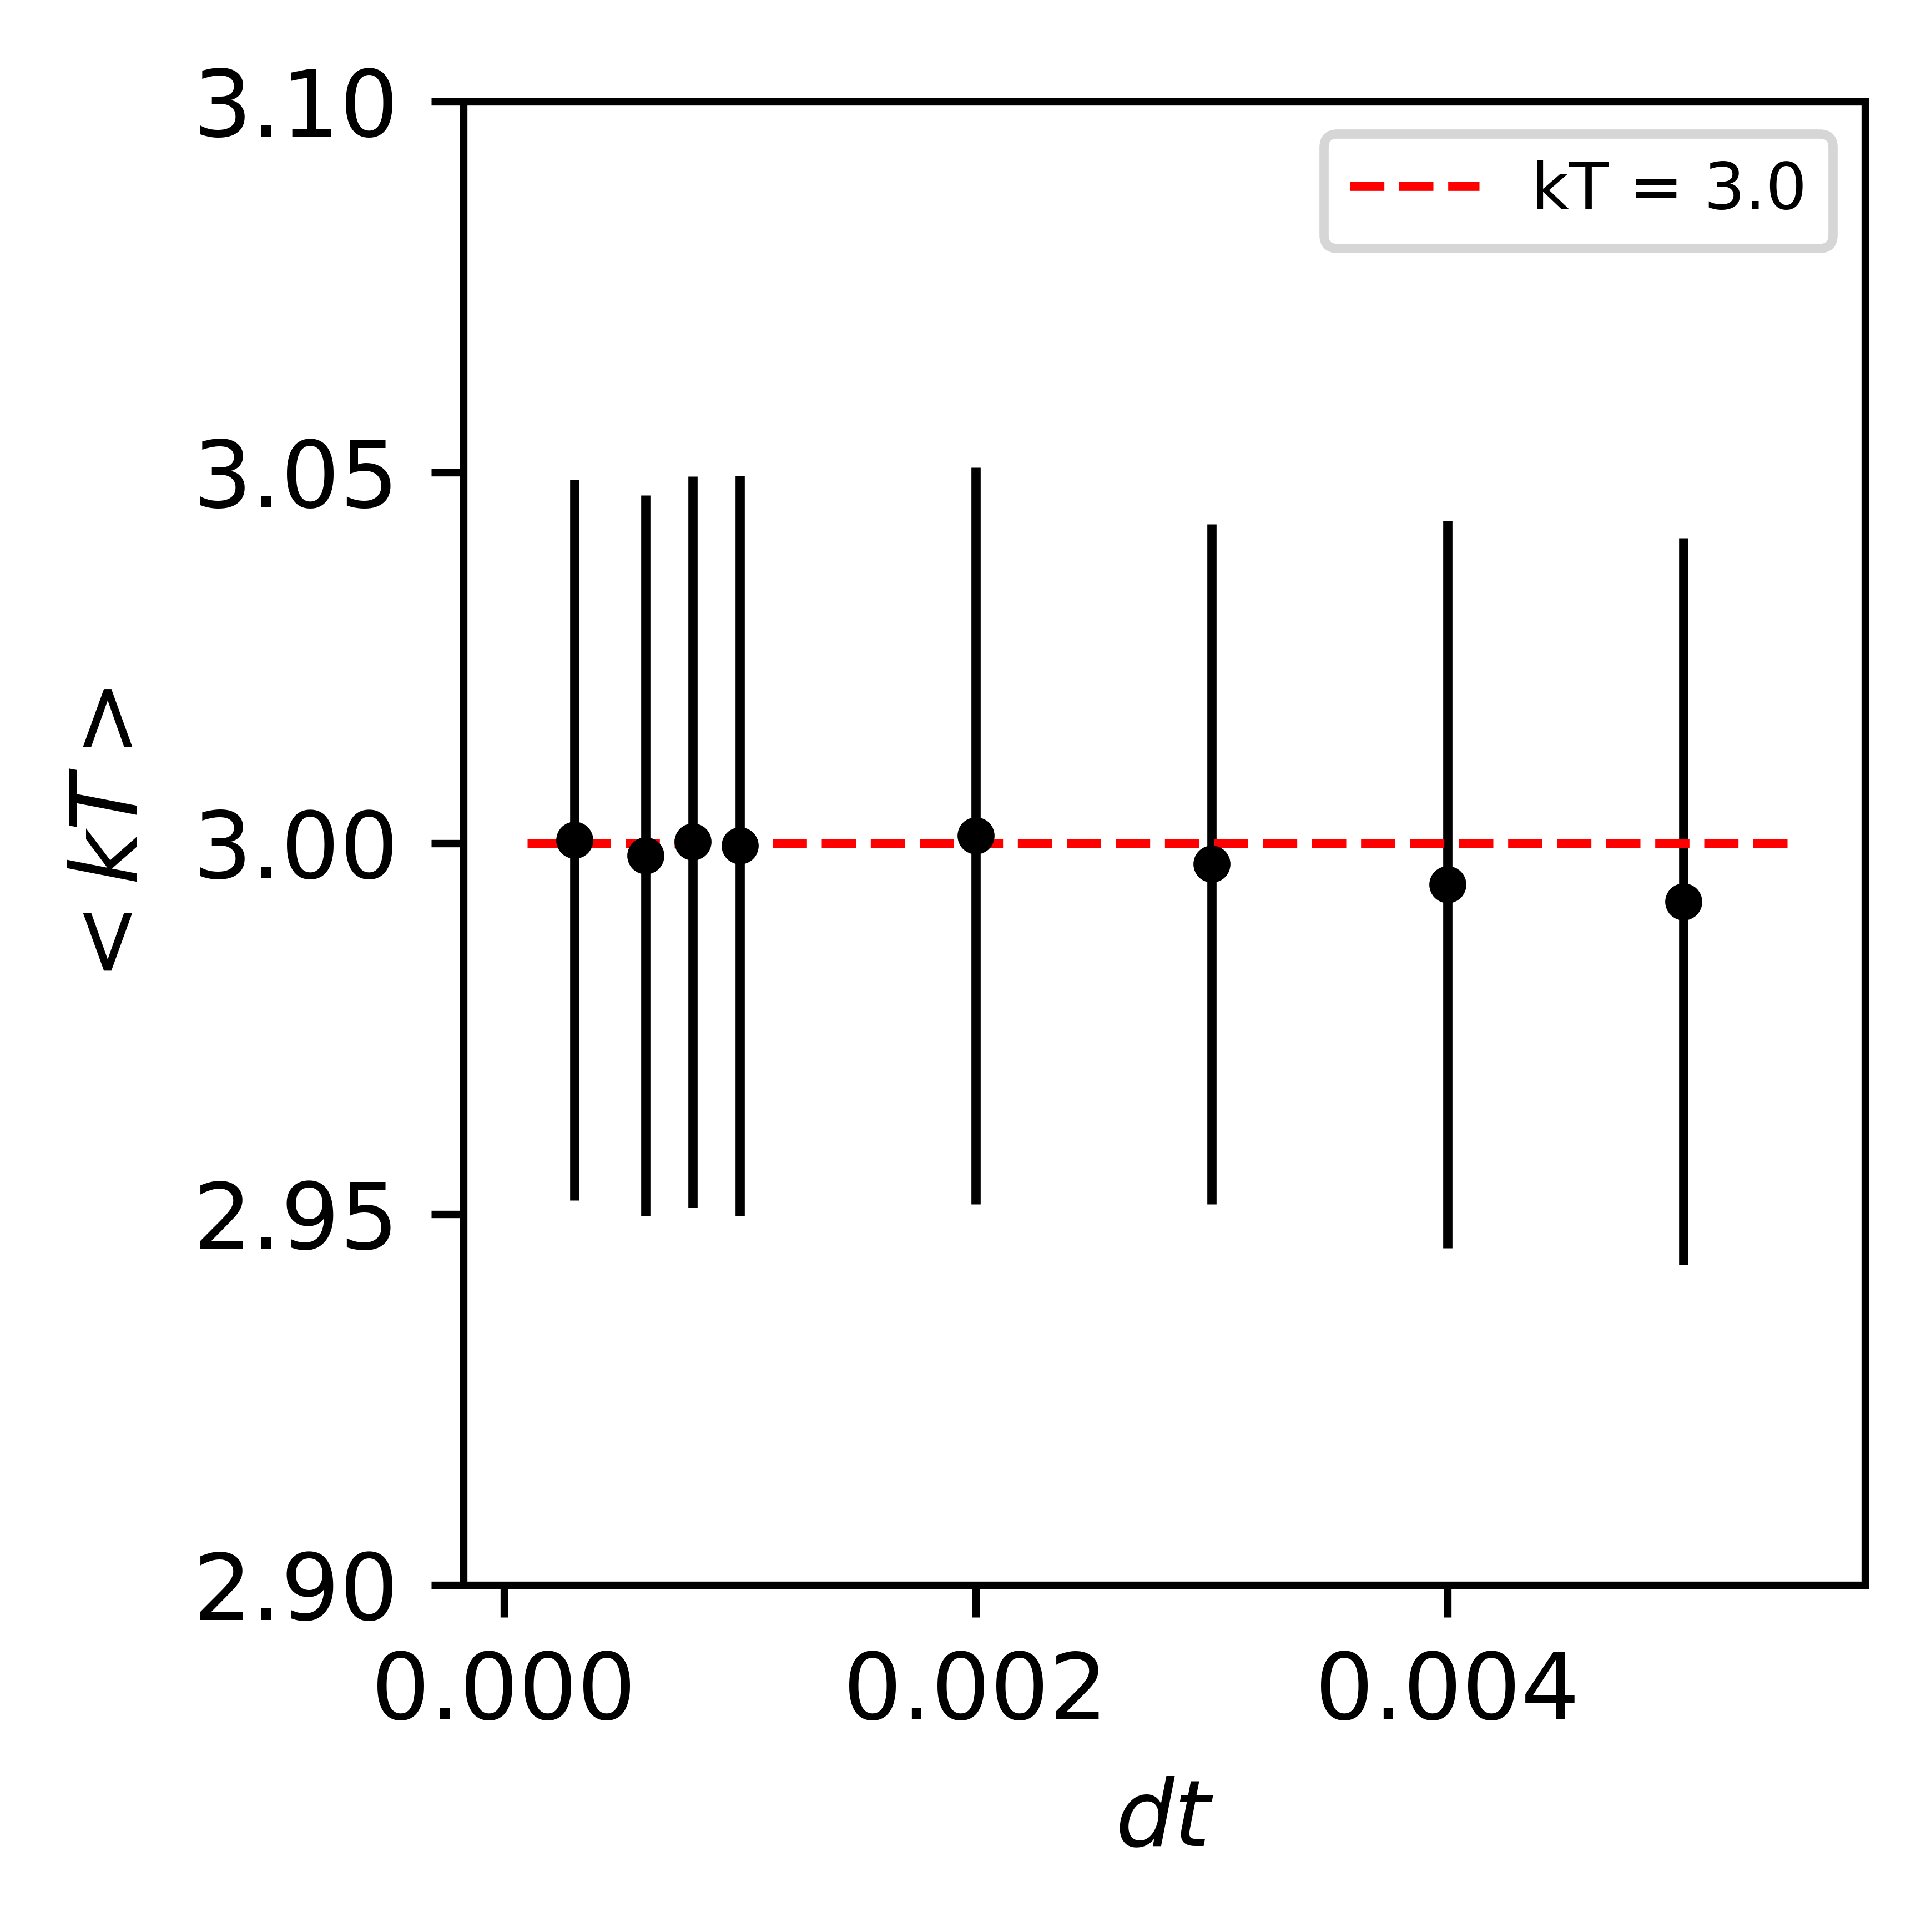

In [42]:
for dt, jobs in dt_project.find_jobs().groupby("dt"):
    for job in jobs:
        data = np.genfromtxt(job.fn("log0.txt"), names=True)
        temp = data["mdcomputeThermodynamicQuantitieskinetic_temperature"]
        uncorr_temp, a, b, c = equil_sample(temp)
        avg = np.mean(uncorr_temp)
        err = sem(uncorr_temp)
        err = np.std(uncorr_temp)
        print(dt, np.round(avg, 4), "+/-", np.round(err, 4))

        plt.errorbar(x=dt, y=avg, yerr=err, c="k", marker="o")

plt.hlines(y=3.0, xmin=0.0001, xmax=0.0055, color="r", linestyle="--", label="kT = 3.0")
plt.ylim(2.9, 3.1)
plt.xlabel("$dt$")
plt.ylabel("$<kT>$")
plt.legend()
plt.tight_layout()

if SAVE_FIGS:
    plt.savefig("../../FIGS/cg-model-dt.png")